In [84]:
#call libraries

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
#load data

In [87]:
df= pd.read_csv("weatherAUS.csv")

In [88]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [89]:
#Extract column names for future reference

In [90]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [91]:
#Preprocessing

In [92]:
#Check dataset for null values

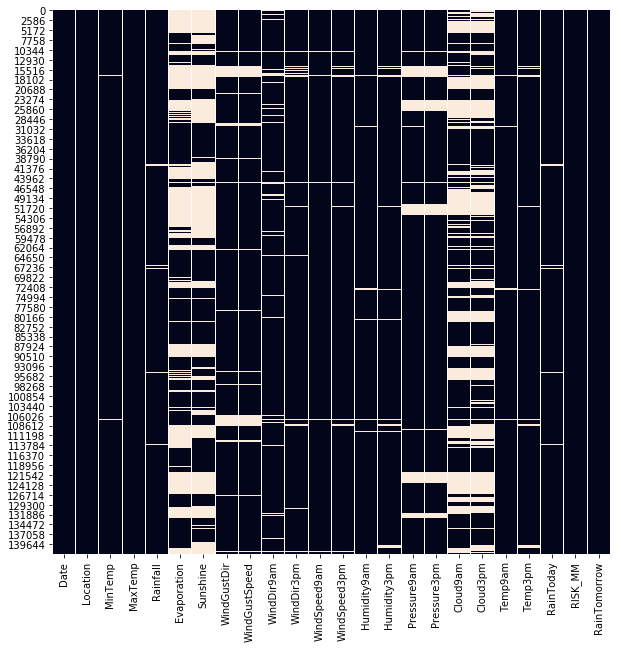

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [94]:
#Drop all records containing even one null value

In [95]:
df.dropna(inplace=True)

In [96]:
#Check null values now

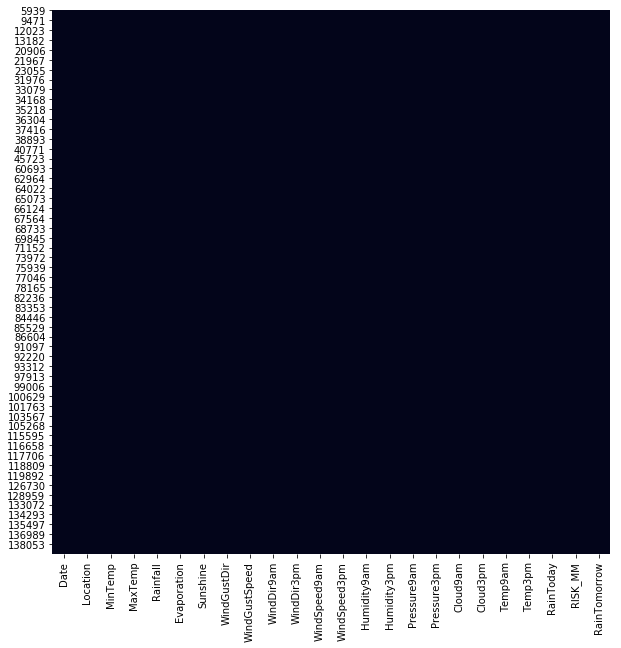

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [98]:
#Reset Index since many records have been deleted

In [99]:
df.reset_index(drop=True,inplace=True)

In [100]:
#Assess which columns can be used for an ml model, and which ones would simply be to complicated to operate on

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 24 columns):
Date             56420 non-null object
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_MM          

In [102]:
#Hence drop unwanted columns

In [103]:
df.drop(['Date', 'Location','WindDir9am', 'WindDir3pm'],axis=1,inplace=True)

In [104]:
#Check columns now

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_MM          56420 non-null float64
RainTomorrow     56420 non-null object
dtypes: float64(17), object(3)
memory usage: 8.6+ MB


In [106]:
#Extrapolate meaningful and usable (binary) data from 'WindGustDir' column into
#fN indicating 'From North', 
#fS indicating 'From South',
#fW indicating 'From West',
#fE is IGNORED since if all the other columns are 0 it is automatically assumed From East

In [107]:
def swap1(x):
    if x[0]=="N":
        return 1
    else:
        return 0

In [108]:
def swap2(x):
    if x[0]=="S":
        return 1
    else:
        return 0

In [109]:
def swap3(x):
    if x[0]=="W":
        return 1
    else:
        return 0

In [110]:
df["fN"]=df["WindGustDir"].apply(swap1)
df["fS"]=df["WindGustDir"].apply(swap2)
df["fW"]=df["WindGustDir"].apply(swap3)

In [111]:
#View extrapolated information to verify validity

In [112]:
df[["WindGustDir","fN","fS","fW"]].head()

,WindGustDir,fN,fS,fW
0,SSW,0,1,0
1,S,0,1,0
2,NNE,1,0,0
3,WNW,0,0,1
4,WNW,0,0,1


In [113]:
#We must now repeat the same to extrapolate meaning from the end direction, 
#tN indicating 'to North', 
#tS indicating 'to South',
#tW indicating 'to West',
#tE indicating 'to East', this column is not ignored here since sometimes there is no end direction

In [114]:
df["WindGustDir"].loc[0][-1:] #Checking how to call last element of WindGustDir element, [-1:] means last character

'W'

In [115]:
len(df["WindGustDir"].loc[0]) #Checking how to call length of WindGustDir element

3

In [116]:
def backswap1(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="N":
            return 1
        else:
            return 0
        

In [117]:
def backswap2(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="E":
            return 1
        else:
            return 0

In [118]:
def backswap3(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="S":
            return 1
        else:
            return 0

In [119]:
def backswap4(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=="W":
            return 1
        else:
            return 0

In [120]:
df["tN"]=df["WindGustDir"].apply(backswap1)
df["tE"]=df["WindGustDir"].apply(backswap2)
df["tS"]=df["WindGustDir"].apply(backswap3)
df["tW"]=df["WindGustDir"].apply(backswap4)

In [121]:
#View extrapolated information to verify validity

In [122]:
df[["WindGustDir","fN","fS","fW","tN","tE","tS","tW"]].head()

,WindGustDir,fN,fS,fW,tN,tE,tS,tW
0,SSW,0,1,0,0,0,0,1
1,S,0,1,0,0,0,0,0
2,NNE,1,0,0,0,1,0,0
3,WNW,0,0,1,0,0,0,1
4,WNW,0,0,1,0,0,0,1


In [123]:
#Checking preprocessed dataset so far

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 27 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_MM          56420 non-null float64
RainTomorrow     56420 non-null object
fN               56420 non-null int64
fS               56420 non-null int64
fW               5

In [125]:
#Removing 'WindGustDir' column, now that we extrapolated information we longer need it in dataset

In [126]:
df.drop("WindGustDir",axis=1,inplace=True)

In [127]:
#Checking data type of 'RainToday' and 'RainTomorrow' columns

In [128]:
df[["RainToday","RainTomorrow"]].head()

,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No


In [129]:
#Our logistic regression model will not work with boolean/categorical data, we need to convert this to binary

In [130]:
marker1=pd.get_dummies(df["RainToday"],drop_first=True)
marker2=pd.get_dummies(df["RainTomorrow"],drop_first=True)

In [131]:
df["RainToday"]=marker1
df["RainTomorrow"]=marker2

In [132]:
#Check now

In [133]:
df[["RainToday","RainTomorrow"]].head()

,RainToday,RainTomorrow
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [134]:
df.info() #Check all columns now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 26 columns):
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustSpeed    56420 non-null float64
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null uint8
RISK_MM          56420 non-null float64
RainTomorrow     56420 non-null uint8
fN               56420 non-null int64
fS               56420 non-null int64
fW               56420 non-null int64
tN               5642

In [135]:
#Preprocessing Complete, Save new dataset to csv file

In [136]:
df.to_csv("preprocessed_data.csv") 

In [137]:
#Carry out Machine Learning Phase

In [138]:
#Import libraries and models

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [140]:
#Split dataset into input and output columns (x) & (y)

In [141]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [142]:
#Split dataset into 2 new datasets, Train Data (x) & Test Data (y)

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [144]:
#Train the model with input and desired output from train data

In [145]:
lm=LogisticRegression()

In [146]:
lm.fit(x_train,y_train)

C:\Users\verghesewin10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
#Model is now created, we can now test it by only feeding input from Test Data

In [148]:
pred=lm.predict(x_test)

In [149]:
#Call evaluation libraries

In [150]:
from sklearn.metrics import classification_report,confusion_matrix

In [151]:
#Evaluate accuracy of your model by comparing your Predicted Output vs. Actual Output for Test Data

In [152]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13297
           1       1.00      1.00      1.00      3629

   micro avg       1.00      1.00      1.00     16926
   macro avg       1.00      1.00      1.00     16926
weighted avg       1.00      1.00      1.00     16926



In [153]:
#Yay, 100% accuracy